In [2]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
from persiantools.jdatetime import JalaliDate
from persiantools.jdatetime import JalaliDateTime
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import datetime, pytz
import math

from sklearn.model_selection import train_test_split

In [3]:
from Prepare_With_Dollar import*

In [4]:
Data=pd.read_excel("/media/sda6/Projects/Data Mining on gas Network/output.xls",dtype={'TOF':"category", 'AF':"category",
       'DS':"category", 'feeder':"category",'TOP':"category", 'Relay':"category", 'COB':"category", 'PD':"category",
       'COP':"category","DOFDB":"float64"})

In [5]:
time=list()
for i in Data['DFB']:
    i=i.split()
    yeardaymonth=i[0].split("/")
    hourandminute=i[1].split(":")
    time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2])).to_gregorian())
Data['DFB']=time

In [6]:
time=list()
for i in Data['CFB']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['CFB']=time

In [7]:
time=list()
for i in Data['PS']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['PS']=time

In [8]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   BN      1649 non-null   int64         
 1   TOF     1649 non-null   category      
 2   AF      1649 non-null   category      
 3   DS      1649 non-null   category      
 4   feeder  1649 non-null   category      
 5   RC      1649 non-null   float64       
 6   TOP     1649 non-null   category      
 7   Relay   1649 non-null   category      
 8   COB     1649 non-null   category      
 9   PD      858 non-null    category      
 10  COP     807 non-null    category      
 11  DFB     1649 non-null   datetime64[ns]
 12  CFB     1646 non-null   datetime64[ns]
 13  DOFDB   1649 non-null   float64       
 14  PS      812 non-null    datetime64[ns]
 15  STOLP   813 non-null    float64       
 16  EENS    1649 non-null   float64       
dtypes: category(9), datetime64[ns](3), float64(4), int64

In [9]:
Daily_Accident=Data.groupby("DFB")["DFB"].count()

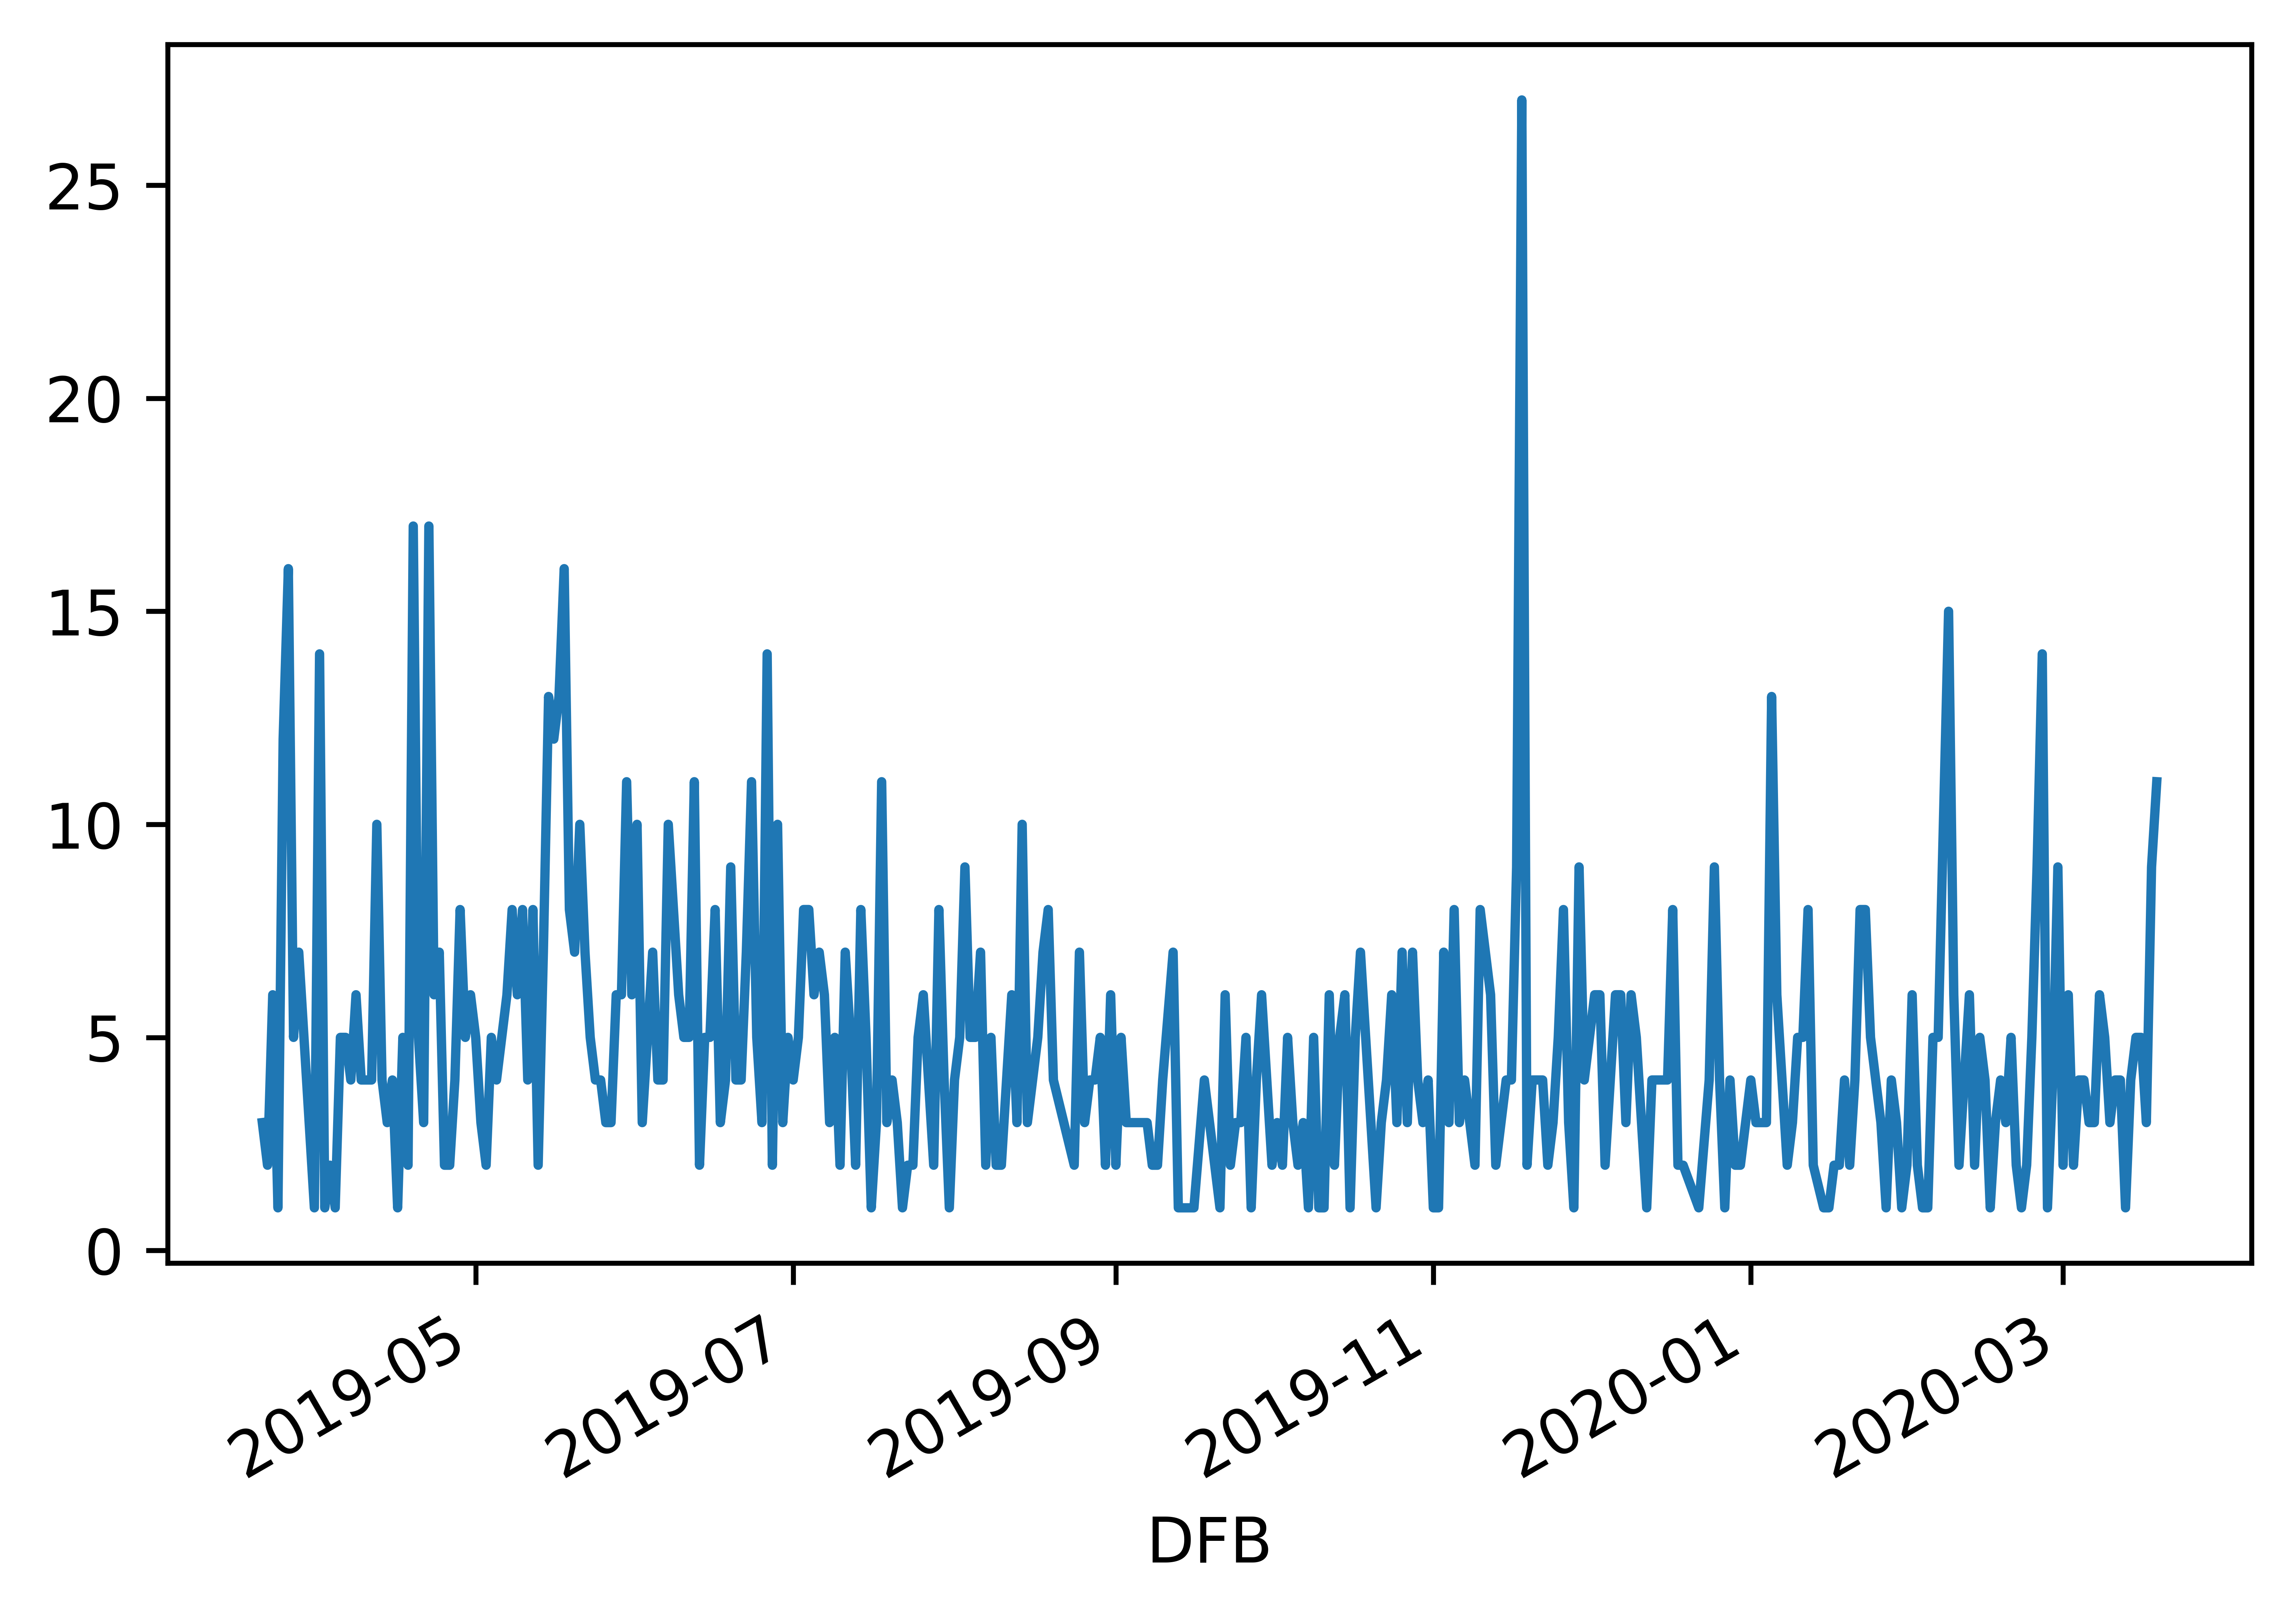

In [10]:
plt.figure(dpi=1200)
Daily_Accident.plot();

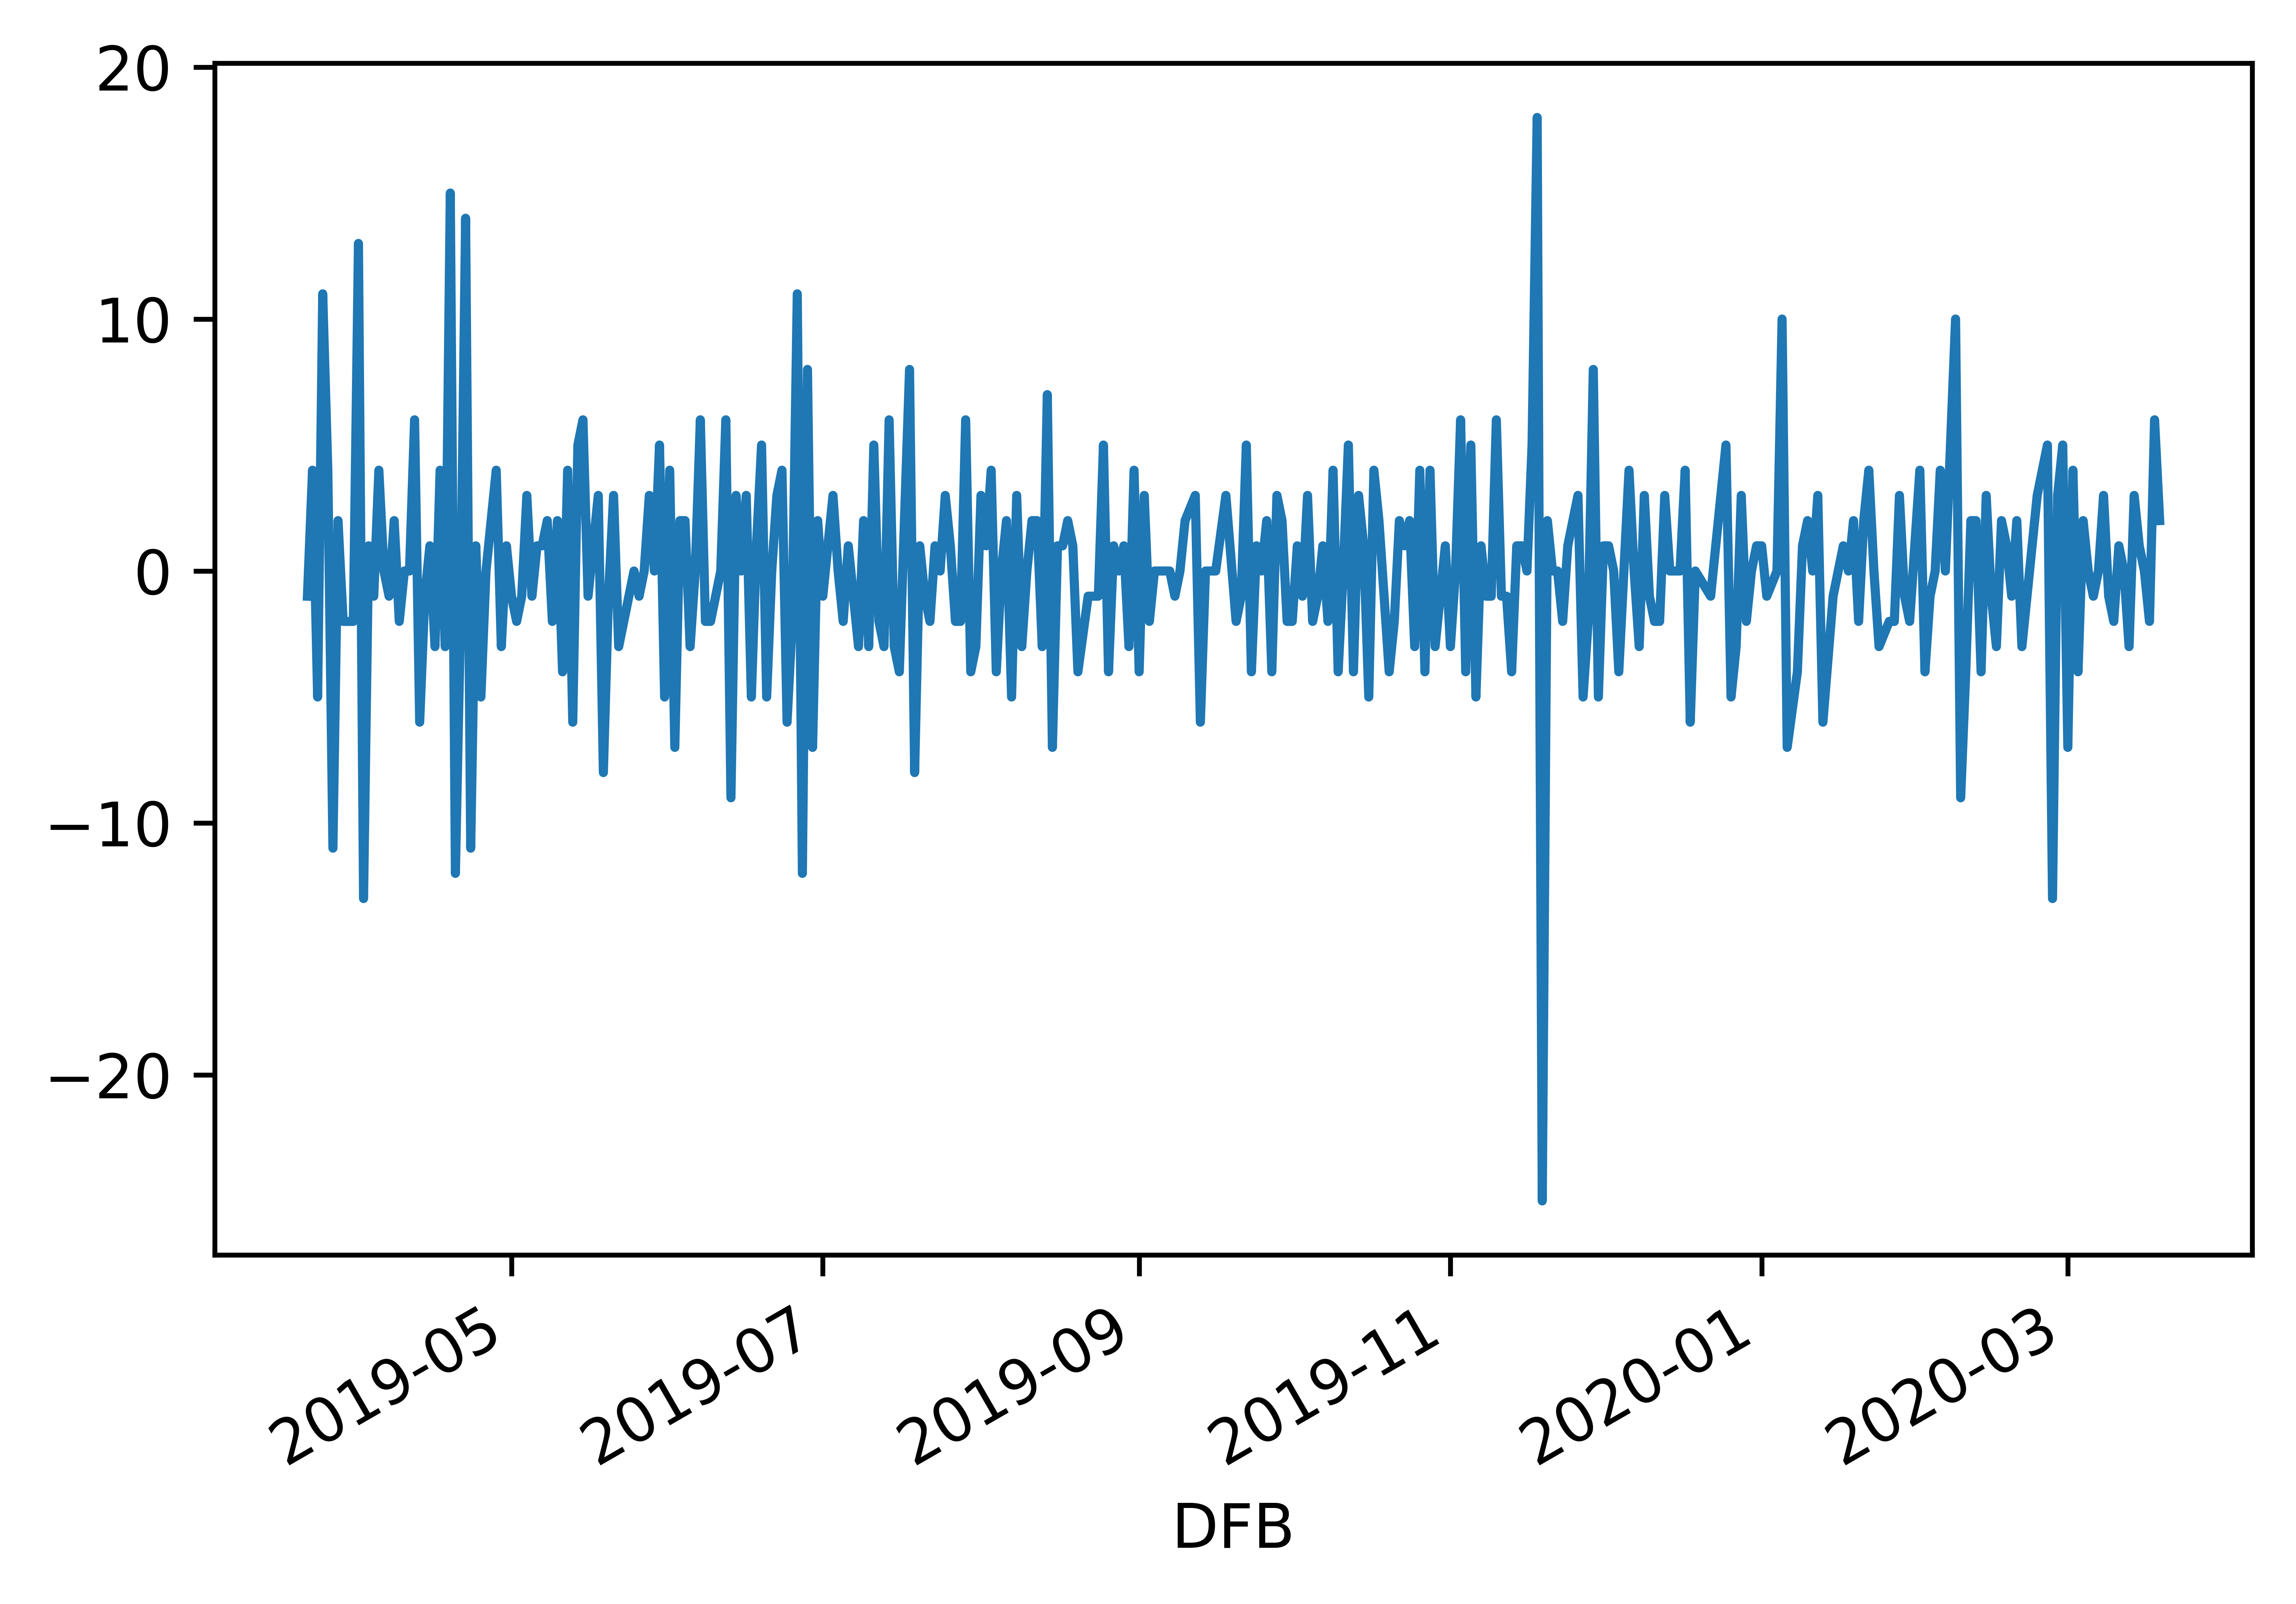

In [11]:
plt.figure(dpi=1200)
Daily_Accident.diff().plot();

In [12]:
from fbprophet import Prophet

In [13]:
Daily_Accident=pd.DataFrame({"ds":Daily_Accident.index,"y":Daily_Accident.values})

In [14]:
#Train & Test
train,test=train_test_split(Daily_Accident,test_size=30,shuffle=False)

In [20]:
m = Prophet(daily_seasonality=False,yearly_seasonality = False, weekly_seasonality = True)
m = m.fit(train)
future = m.make_future_dataframe(periods= 30)

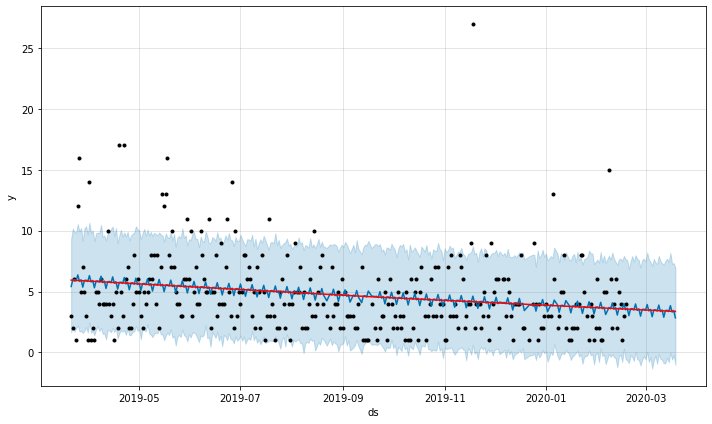

In [21]:
forecast=m.predict(future)
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


In [100]:
forecast=forecast[-30:]
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
319,2020-02-19,3.559050,-0.403251,7.868872,3.559050,3.559050,0.073254,0.073254,0.073254,0.073254,0.073254,0.073254,0.0,0.0,0.0,3.632305
320,2020-02-20,3.552499,-1.062290,7.080391,3.552499,3.552499,-0.525341,-0.525341,-0.525341,-0.525341,-0.525341,-0.525341,0.0,0.0,0.0,3.027158
321,2020-02-21,3.545949,-0.682122,7.643179,3.545949,3.545954,0.032093,0.032093,0.032093,0.032093,0.032093,0.032093,0.0,0.0,0.0,3.578042
322,2020-02-22,3.539398,-0.379550,7.816842,3.539390,3.539422,0.063470,0.063470,0.063470,0.063470,0.063470,0.063470,0.0,0.0,0.0,3.602868
323,2020-02-23,3.532847,-0.888845,7.373234,3.532819,3.532895,-0.036629,-0.036629,-0.036629,-0.036629,-0.036629,-0.036629,0.0,0.0,0.0,3.496219
324,2020-02-24,3.526297,-0.142840,7.906419,3.526233,3.526372,0.456847,0.456847,0.456847,0.456847,0.456847,0.456847,0.0,0.0,0.0,3.983144
325,2020-02-25,3.519746,-0.734802,7.265412,3.519653,3.519857,-0.063694,-0.063694,-0.063694,-0.063694,-0.063694,-0.063694,0.0,0.0,0.0,3.456052
326,2020-02-26,3.513195,-0.341867,7.843596,3.513068,3.513362,0.073254,0.073254,0.073254,0.073254,0.073254,0.073254,0.0,0.0,0.0,3.586450
327,2020-02-27,3.506645,-1.203843,6.901549,3.506476,3.506859,-0.525341,-0.525341,-0.525341,-0.525341,-0.525341,-0.525341,0.0,0.0,0.0,2.981303
328,2020-02-28,3.500094,-0.441091,7.595001,3.499878,3.500368,0.032093,0.032093,0.032093,0.032093,0.032093,0.032093,0.0,0.0,0.0,3.532187


In [101]:
rms = sqrt(mean_squared_error(test.y,forecast.yhat))
print("RMSE =",rms)
ape=(abs(test.y-forecast.yhat)/test.y)*100
print(ape.mean())

RMSE = 3.251987566381635
57.58834880078652
